# STOR 535 Python Worksheet 2
**Instructor**: Dr. Amarjit Budhiraja

**Due date and time**: October 6, 2020, 9:45 AM

**Submitted by**: Julia Mengxuan Yu

## Submission Information:
0. **Download the file Python Worksheet 2.ipynb from Sakai**. This is under Resources $\rightarrow$ Homeworks. You will be doing all the work below in the Jupyter notebook.
1. Write your name in the box above.
2. Please make sure to print the output for each of the parts of the problems below. You will be graded based on these outputs.
3. After you complete the worksheet, generate a pdf of it using the instructions given in the Python tutorial on Aug 12, 2020. **Upload the pdf file as your submission on Gradescope. Do not submit the ipynb file.** 
4. Your final submission must be a single pdf file uploaded on Gradescope.

In [2]:
import numpy as np
import random
import math

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Useful for probability calculations
from scipy import stats
from scipy import special
import numpy as np
import pylab
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display
from matplotlib.ticker import FormatStrFormatter

## Problem 1: Fixed Points of a Random Permutation ##

Let $M_n$ be the number of fixed points in a random permutation of the values $1, 2, 3, \ldots, n$. You can think of $M_n$ as the number of matches when $n$ letters labeled $1$ through $n$ are permuted randomly into $n$ envelopes labeled $1$ through $n$. For more clarity, we give an example. Let $n=5$ and suppose that

+ Letter 1 is placed in envelope 4 and,
+ Letter 2 is placed in envelope 2 and,
+ Letter 3 is placed in envelope 3 and,
+ Letter 4 is placed in envelope 5 and,
+ Letter 5 is placed in envelope 1.

Then in this case $M_5 = 2$ as letter $2$ is placed in envelope $2$, letter $3$ is placed in envelope $3$ and there are no other matches.

The distribution of $M_n$ is given by 

$$
P(M_n = k) ~ = ~ 
\frac{1}{k!} \cdot \big{(} \frac{1}{0!} - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)} \\
$$
for $0 \le k \le n$. For example we have 

$$P(M_n = n) = \frac{1}{n!} \cdot \frac{1}{0!} = \frac{1}{n!}$$ 
and,  

$$P(M_n = 1) = \frac{1}{1!} \cdot \big{(} \frac{1}{0!} - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-1}\frac{1}{(n-1)!} \big{)}.$$



### 1a) Computing $P(M_n = k)$ ###
Define a function `prob_matches` that takes $k$ and $n$ as its arguments and returns $P(M_n = k)$. Use as many lines of code as you need. Be careful about the signs in the expression of the probability above. 

In [31]:
def prob_matches(k, n):
    p1=1/math.factorial(k)
    i=0
    p2=0
    for i in range (0,n-k+1):
       p2=p2+((-1)**i)*(1/math.factorial(i))
    i+=1
    return p1*p2

To confirm that your function is working correctly, think about what $P(M_n = n-1)$ should be, and then run the cell below to check.

In [32]:
prob_matches(99, 100)

0.0

Use the formula for $P(M_n = k)$ to think about why $P(M_n = 0)$ is very close to $P(M_n = 1)$ when $n$ is large.

Now run the cell below and confirm that your function is working correctly.

In [33]:
prob_matches(0, 100), prob_matches(1, 100)

(0.36787944117144245, 0.36787944117144245)

Finally print the values of your function at $k= 4, 8,$ and $12$ by running the code below.

In [34]:
prob_matches(4, 100), prob_matches(8, 100), prob_matches(12, 100)

(0.015328310048810101, 9.12399407667268e-06, 7.680129694168923e-10)

###  1b) Computing $P(M_n \leq k)$ ###

Use `prob_matches` to define a function `match_dist` that takes $n$ as its argument and returns an array consisting of the probabilities $P(M_n = k)$ for $0 \le k \le n$. 

In [35]:
def match_dist(n):
    k=0
    prob=[]
    for k in range(0,n+1):
        p=prob_matches(k,n)
        prob.append(p)
        k+=1
    return np.array(prob)

Use your function `match_dist` to compute $P(M_{100} \leq 2)$ and $P(M_{100} \leq 10)$.



In [36]:
m2=list(range(3))
m10=list(range(11))
print(match_dist(100)[m2].sum())
print(match_dist(100)[m10].sum())

0.9196986029286061
0.9999999899522339


### 1c)  Visualizating the Distribution ###
Plot the distribution of $M_{100}$, the number of matches in the matching problem with 100 letters. You may use plotting code from class or Python Worksheet 1.


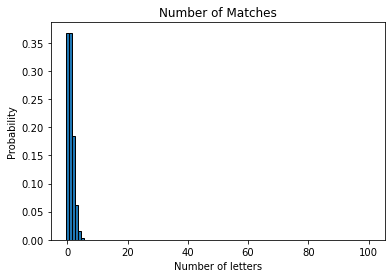

In [37]:
min_letters = 0 
max_letters = 100 
num_letters = list(range(0,101)) 
probs = [prob_matches(i,max_letters+1) for i in num_letters]
plt.bar(num_letters, probs, width = 1, edgecolor = "black") 
plt.title("Number of Matches") 
plt.xlabel("Number of letters") 
plt.ylabel("Probability") 
plt.show()

## Problem 2: Extrema ##

The maximum and minimum of a random sample of numbers are called the "extrema" of the sample. 

Fix positive integers $n$ and $N$. Suppose $n$ draws are made at random with replacement from the numbers $\{1, 2, 3, \ldots, N\}$. Let $X_i$ be the number that appears on the $i$th draw.

Let $V_n = \min\{X_1, X_2, \ldots, X_n\}$ be the sample minimum and let $W_n = \max\{X_1, X_2, \ldots, X_n\}$ be the sample maximum.

We will use simulations to compute an approximation to the distribution of $W_n$.

### 2a)
Write a function named `max_sim` that takes $N$ and $n$ as its arguments, randomly draws $n$ times with replacement from $\{1, 2, 3, \ldots, N\}$ and returns the maximum of the draws.

In [38]:
def max_sim(N,n):
    i=0
    num=0
    for i in range(0,n):
        term=random.randint(1,N)
        if term > num:
            num = term
        i+=1
    return num

The function you coded above gives one sample from the distribution of $W_n$. We now generate many samples to create an approximation to the  distribution of $W_n$.

### 2b) Approximation to $W_n$
Fix $N = 100$ and $n = 10$. We generate $m = 1000$ samples and compute an approximation to the distribution of $W_{10}$.

In [39]:
m=1000
my_samples = [max_sim(100,10) for i in range(m)]
w_dist = [my_samples.count(i)/m for i in range(1,101)]


Visualize the distribution `w_dist` created in the code above. You may use plotting code from class or from Python Worksheet 1 for the visualization.

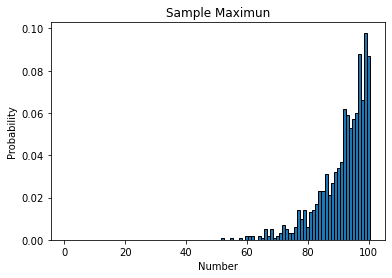

In [40]:
min_ = 1 
max_ = 101 
num = list(range(min_,max_)) 
plt.bar(num, w_dist, width = 1, edgecolor = "black") 
plt.title("Sample Maximun") 
plt.xlabel("Number") 
plt.ylabel("Probability") 
plt.show()

### 2c) Expectation and Variance of $W_n$
Use the distribution computed in the previous part to compute an approximate value of the expected value, $\mathbf{E}(W_{10})$, and the variance, $\mathbf{Var}(W_{10})$.

In [41]:
Ex=np.sum(np.arange(1,101)*w_dist)
xsquare=np.arange(1,101)**2
Exsquare=np.sum(xsquare*w_dist)
var=Exsquare-Ex**2
print("Expectation is", Ex, "Variance is", var)

Expectation is 91.563 Variance is 64.8240310000001


### 2d) Distribution of $V_n$

Review the definition of $V_n$ again. Fix $N = 100$ and $n = 10$. We want to compute an approximation to the distribution of $V_{10}$. Modify the code from previous parts of this problem to complete this part. Your final output for this part should be a plot to visualize the probability of $V_{10}$.

In [42]:
def min_sim(N,n):
    i=0
    num=float('inf')
    for i in range(0,n):
        term=random.randint(1,N)
        if term < num:
            num = term
        i+=1
    return num

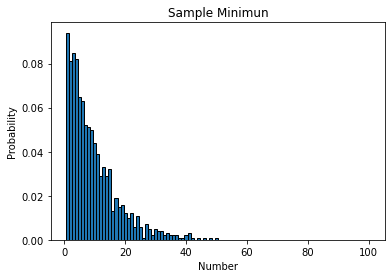

In [43]:
m=1000
my_samples = [min_sim(100,10) for i in range(m)]
v_dist = [my_samples.count(i)/m for i in range(1,101)]
min_2 = 1 
max_2 = 101
num2 = list(range(min_2,max_2)) 
plt.bar(num2, v_dist, width = 1, edgecolor = "black") 
plt.title("Sample Minimun") 
plt.xlabel("Number") 
plt.ylabel("Probability") 
plt.show()